In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
import matplotlib
%matplotlib inline
plt.style.use('ggplot')

In [36]:
from scipy import stats
from math import ceil

def z_power(alpha, n, mu_a, mu_b, s):
    '''Calculates the power of a one-tailed Z-test.

        Args:
            alpha: Allowable Type I error rate.
            n: Sample size.
            mu_a: The mean value of a
            mu_b: The mean value of b
            s: The standard deviation of a
        Returns:
            power: the power of the z-test
    '''
    stderr = s / n**.5
    score = (mu_b - mu_a)/stderr - stats.norm.ppf(1-alpha)
    return stats.norm.cdf(score)

def z_solve_for_n(power, alpha, mu_a, mu_b, s):
    '''Solves for the number of samples needed
        to achieve a particular power on a one-tailed Z-test.

        Args:
            power: The desired power.
            alpha: Allowable Type I error rate.
            mu_a: The mean value of a
            mu_b: The mean value of b
            s: The standard deviation of a (note: We make a simplying assumption that)
        Returns:
            n: The required sample size.
    '''
    return ((stats.norm.ppf(1-beta) - stats.norm.ppf(alpha)) * s / (mu_b - mu_a) )**2

if __name__ == "__main__":
    # Breakout 2 starting code
    alpha = 0.10 # tolerated Type I error rate (incorrectly rejecting H0)
    beta = 0.05   # tolerated Type II error rate (failing to reject H0 when we should)
    power = 1 - beta
    n = 100

    mu_a = 0.70  # the mean value of a
    mu_b = 0.75  # the mean value of b
    s = 0.46    # the standard deviation of a
    
#     required_n = z_solve_for_n(power, alpha, mu_a, mu_b, s)
#     power_req = z_power(alpha, n, mu_a, mu_b, s)
#     print(required_n)
#     print('')
#     print(power_req)
    

# 1.

In [37]:
coke_weights = np.loadtxt('coke_weights.txt')

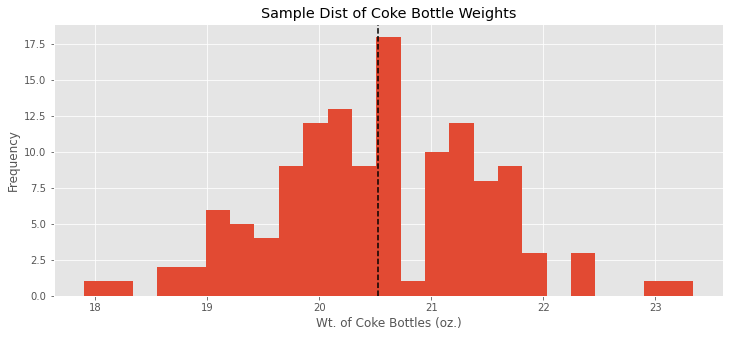

In [38]:
fig, ax = plt.subplots(figsize = (12, 5))

coke_mean = coke_weights.mean()
ax.hist(coke_weights, bins = 25)
ax.axvline(coke_mean, color = 'black', linestyle = '--')
ax.set_title('Sample Dist of Coke Bottle Weights')
ax.set_xlabel('Wt. of Coke Bottles (oz.)')
ax.set_ylabel('Frequency')
print('')

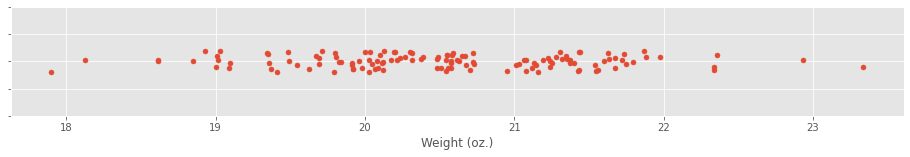

In [39]:
def one_dim_scatterplot(data, ax, jitter=0.2, **options):
    if jitter:
        jitter = np.random.uniform(-jitter, jitter, size=data.shape)
    else:
        jitter = np.repeat(0.0, len(data))
    ax.scatter(data, jitter, **options)
    ax.yaxis.set_ticklabels([])
    ax.set_xlabel("Weight (oz.)")
    ax.set_ylim([-1, 1])
    
fig, ax = plt.subplots(1, figsize=(16, 2))
one_dim_scatterplot(coke_weights, ax, s=25)

# 2. / 3.

In [28]:
# H0: mean bottle wt = 20.4
# HA: mean bottle wt != 20.4
alpha = 0.05

# 4.

In [44]:
coke_std_error = (coke_weights.std() / np.sqrt(130))
h0_dist = stats.norm(loc = 20.4, scale = coke_std_error)

In [63]:
coke_std_error

0.0839942866704848

# 5.

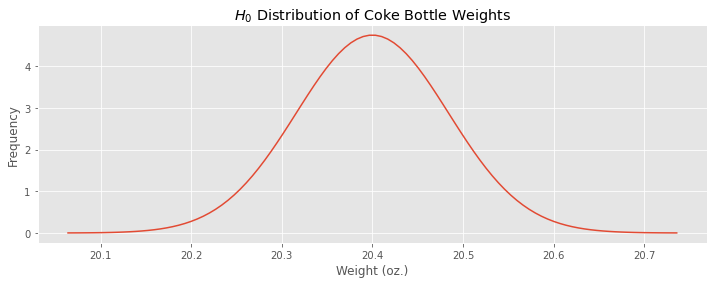

In [59]:
fig, ax = plt.subplots(figsize=(12, 4))

t = np.linspace((20.4 - 4 * coke_std_error), (20.4 + 4 * coke_std_error), num=100)
ax.plot(t, h0_dist.pdf(t))
ax.set_title("$H_0$ Distribution of Coke Bottle Weights")
ax.set_xlabel("Weight (oz.)")
ax.set_ylabel("Frequency")
print('')

# 6. 

In [110]:
ha_dist = stats.norm(loc = 20.5, scale = coke_std_error)

In [111]:
def plot_coke_distributions(ax):
    t = np.linspace((20.4 - 4 * coke_std_error), (20.4 + 4 * coke_std_error), num=250)
    ax.plot(t, h0_dist.pdf(t), label="H0")
    ax.plot(t, ha_dist.pdf(t), label ="Ha" )    
    ax.legend()

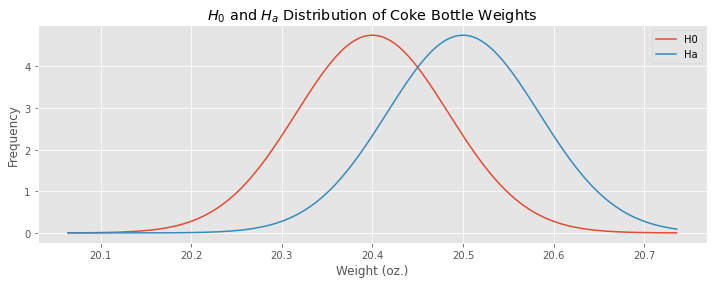

In [112]:
fig, ax = plt.subplots(figsize=(12, 4))

plot_coke_distributions(ax)

ax.set_title("$H_0$ and $H_a$ Distribution of Coke Bottle Weights")
ax.set_xlabel("Weight (oz.)")
ax.set_ylabel("Frequency")
print('')

# 7. 

In [140]:
sig_level = 0.05
half_sig = sig_level / 2

rline = h0_dist.ppf(1 - half_sig)
lline = ha_dist.ppf(half_sig)-.1
print(rline, lline, half_sig)

20.56462577678128 20.235374223218717 0.025


In [141]:
def plot_coke_rejections(ax):
    t = np.linspace(start = (20.4 - 4 * coke_std_error), stop = (20.4 + 4 * coke_std_error), num = 250)


    ax.axvline(lline, color = 'black', linestyle = '--', label = 'critical')
    ax.axvline(rline, color = 'black', linestyle = '--')



In [132]:
critical_value_right = h0_dist.ppf(1 - 0.025)
critical_value_left = h0_dist.ppf(0.025)

In [133]:
def plot_rejection_reigons(ax):
    t = np.linspace(20.4 - 4*coke_std_error, 20.4 + 4*coke_std_error, num=250)

    ax.axvline(critical_value_left, color="grey", linestyle="--", label = "critical_value")
    ax.axvline(critical_value_right, color="grey", linestyle="--")

    tpos = t[t >= critical_value_right]
    ax.fill_between(tpos, 0, h0_dist.pdf(tpos), 
                    color=color_cycle[0], alpha=0.2, label=r"$\alpha$ = rejection region")

    tneg = t[t <= critical_value_left]
    ax.fill_between(tneg, 0, h0_dist.pdf(tneg), 
                    color=color_cycle[0], alpha=0.2)
    ax.legend()

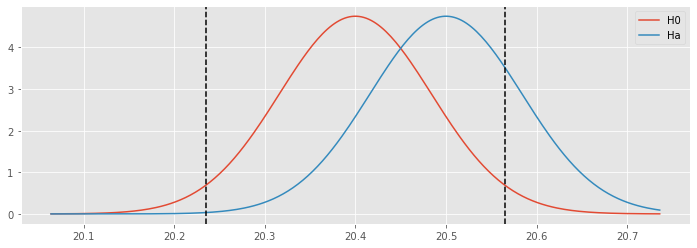

In [142]:
fig, ax = plt.subplots(figsize=(12, 4))

plot_coke_distributions(ax)
plot_coke_rejections(ax)